In [2]:
cd /scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week2/Data

/scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week2/Data


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

In [5]:
##### Question 4 #####

f = open('1hz3_T310.run.25000000.energy.xvg')

lines = f.readlines()

#for num, line in enumerate(lines):
    #print(num, line)

In [6]:
data = lines[29:] #data starts at line 29

data = np.loadtxt(data,unpack=True)

In [7]:
#convert times from ps to ns

times = [i *10**3 for i in data[0]]

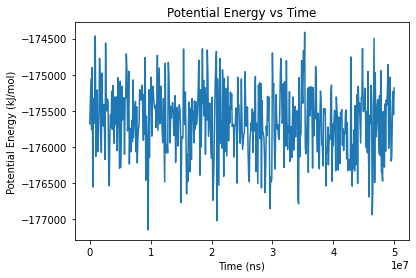

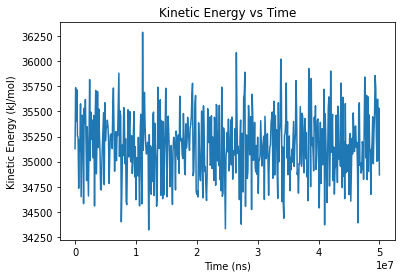

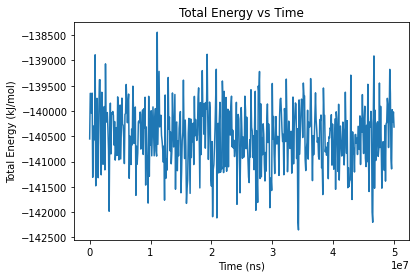

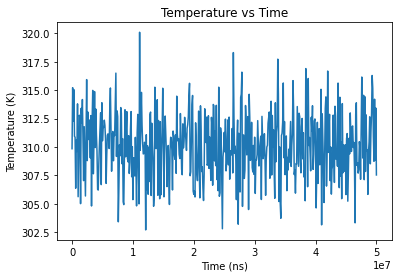

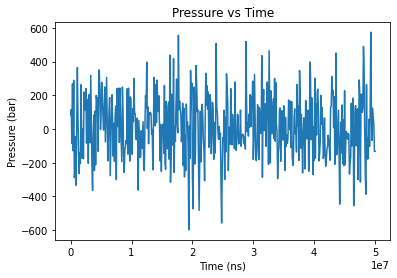

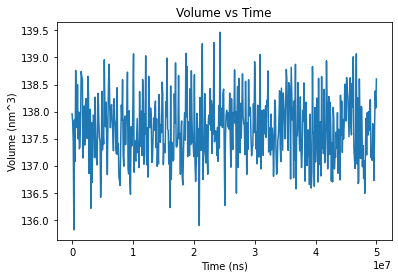

In [8]:
#plots

quantities = [['Potential Energy', 'kJ/mol'],
              ['Kinetic Energy', 'kJ/mol'], 
              ['Total Energy', 'kJ/mol'], 
              ['Temperature', 'K'], 
              ['Pressure', 'bar'],
             ['Volume','nm^3']]

for i in range(len(quantities)):
    plt.plot(times, data[i+1])
    plt.title('{} vs Time'.format(quantities[i][0]))
    plt.xlabel('Time (ns)')
    plt.ylabel('{} ({})'.format(quantities[i][0], quantities[i][1]))
    plt.show()

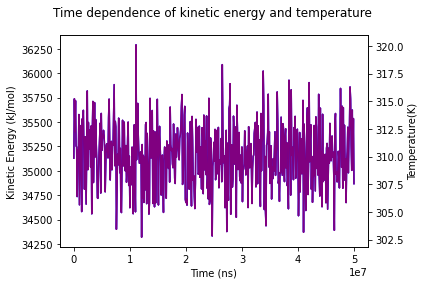

In [22]:
#subplots for kinetic energy and temperature overlaid 

quantities = [['Kinetic Energy', 'kJ/mol'], 
              ['Temperature', 'K']]

fig, ax1 = plt.subplots()
fig.suptitle('Time dependence of kinetic energy and temperature')

ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Kinetic Energy (kJ/mol)')
ax1.plot(times, data[2], color='blue')
               
ax2 = ax1.twinx() 

ax2.set_ylabel('Temperature(K)')  
ax2.plot(times, data[4], color='purple')


fig.tight_layout()  
plt.show()

KE vs time and temp vs time have same shape but different scales, since KE is directly porportional to temperature!

In [23]:
##### Question 5 #####

traj = md.load_pdb('1UBQ_processed.pdb')

In [24]:
#compute number of hydrogen bonds

h_bonds = md.baker_hubbard(traj)

#each array entry consists of donor index, h-atom index, acceptor index

h_bonds

print(f"There are {h_bonds.shape[0]} hydrogen bonds")

There are 57 hydrogen bonds


In [25]:
#count number of atoms

topology = traj.topology

count = 0

for atom in topology.atoms:
    #print(atom)
    count+=1

print(f'There are {count} atoms in the structure')

There are 1405 atoms in the structure


In [26]:
#compute the number of helical amino acids

#get secondary structure of each residue
dssp = md.compute_dssp(traj, simplified=True)

#count the helices
helix_count=0

for i in dssp[0]:
    #print(i)
    if str(i)=='H':
        helix_count+=1
        
print(f'There are {helix_count} helical amino acids')

There are 18 helical amino acids


In [27]:
##### Question 6 #####

traj2 = md.load_xtc('../Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc', top='../Data/1hz3_T310.start.nowater.gro')

In [28]:
# obtain distance between the first and last atom for each time

def end_end(traj):
    # get the first and last atom
    first = traj2.xyz[:,0,:]
    last = traj2.xyz[:,-1,:]
    # compute the distance between the first and last atom
    dist = np.sqrt(np.sum((first-last)**2, axis=1))
    return dist

dist = end_end(traj2)

In [29]:
# obtain radius of gyration for each time

rg = md.compute_rg(traj2)

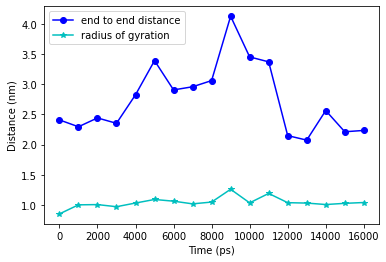

In [6]:
#plots

plt.plot(traj2.time, dist, 'bo-', label='end to end distance')
plt.plot(traj2.time, rg, 'c*-', label='radius of gyration')

plt.xlabel('Time (ps)')
plt.ylabel('Distance (nm)')
plt.legend()

plt.show()

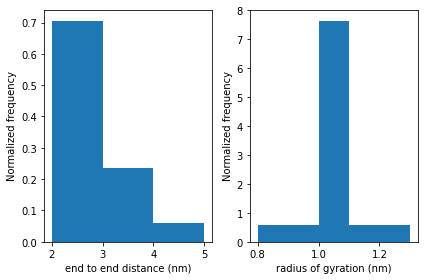

In [30]:
# normalized histograms 

bins1 = [2,3,4,5]

bins2 = [0.8, 0.9, 1, 1.1, 1.2, 1.3]

fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)

axs[0].hist(dist, bins=bins1, density=True)
axs[1].hist(rg, bins=bins2, density=True)

axs[0].set(xlabel='end to end distance (nm)', ylabel='Normalized frequency')
axs[1].set(xlabel='radius of gyration (nm)', ylabel='Normalized frequency')

plt.show()